Step 1: Review the dataset and identify key insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pip install openpyxl

In [19]:
with open("Delinquency_prediction_dataset.xlsx", 'rb') as f:
    print(f.read(100))

b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


•	Open the dataset and review the key columns

In [2]:
csv_data = pd.read_csv('Delinquency_prediction_dataset.csv', encoding='utf-8' )

In [3]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [4]:
csv_data.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [5]:
csv_data.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

In [6]:
num_rows, num_cols = csv_data.shape

In [7]:
num_rows

500

In [8]:
num_cols

19

In [9]:
numeric_columns = csv_data.select_dtypes(include=[np.number]).columns.tolist()

In [10]:
numeric_columns

['Age',
 'Income',
 'Credit_Score',
 'Credit_Utilization',
 'Missed_Payments',
 'Delinquent_Account',
 'Loan_Balance',
 'Debt_to_Income_Ratio',
 'Account_Tenure']

In [11]:
number_cols = [feature for feature in csv_data.columns if csv_data[feature].dtype != 'O']

In [12]:
number_cols

['Age',
 'Income',
 'Credit_Score',
 'Credit_Utilization',
 'Missed_Payments',
 'Delinquent_Account',
 'Loan_Balance',
 'Debt_to_Income_Ratio',
 'Account_Tenure']

In [13]:
categorical_columns = [feature for feature in csv_data.columns if csv_data[feature].dtype == 'O']

In [14]:
categorical_columns

['Customer_ID',
 'Employment_Status',
 'Credit_Card_Type',
 'Location',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6']

In [15]:
col_unique_values = {col: csv_data[col].nunique() for col in csv_data.columns}

In [16]:
col_unique_values

{'Customer_ID': 500,
 'Age': 57,
 'Income': 271,
 'Credit_Score': 234,
 'Credit_Utilization': 492,
 'Missed_Payments': 7,
 'Delinquent_Account': 2,
 'Loan_Balance': 300,
 'Debt_to_Income_Ratio': 487,
 'Employment_Status': 6,
 'Account_Tenure': 20,
 'Credit_Card_Type': 5,
 'Location': 5,
 'Month_1': 3,
 'Month_2': 3,
 'Month_3': 3,
 'Month_4': 3,
 'Month_5': 3,
 'Month_6': 3}

In [177]:
csv_data.Delinquent_Account.value_counts()

Delinquent_Account
0    420
1     80
Name: count, dtype: int64

report : imbalance dataset 

In [180]:
csv_data.duplicated().sum()

np.int64(0)

report : no duplicate row found

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

In [17]:
csv_data.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [181]:
csv_data[csv_data['Delinquent_Account'] == 1].describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,missing_income,missing_Loan_Balnce
count,80.000000,75.000000,80.000000,80.000000,80.000000,80.0,73.000000,80.000000,80.000000,80.000000,80.000000
mean,47.100000,113902.013333,591.150000,0.506887,2.850000,1.0,48358.232877,0.306301,9.200000,0.062500,0.087500
std,15.748498,52977.130684,173.012263,0.171911,1.987938,0.0,30624.786458,0.089896,6.299287,0.243589,0.284349
min,19.000000,19835.000000,307.000000,0.050000,0.000000,1.0,692.000000,0.100000,0.000000,0.000000,0.000000
25%,36.750000,69988.500000,426.000000,0.376109,1.000000,1.0,20374.000000,0.251364,4.000000,0.000000,0.000000
50%,50.000000,108468.000000,625.000000,0.493021,3.000000,1.0,48942.000000,0.303280,9.000000,0.000000,0.000000
75%,59.000000,152818.500000,743.750000,0.643264,5.000000,1.0,75777.000000,0.369609,16.000000,0.000000,0.000000
max,72.000000,199402.000000,847.000000,0.858431,6.000000,1.0,99005.000000,0.494267,19.000000,1.000000,1.000000


In [182]:
csv_data[csv_data["Delinquent_Account"] == 0].describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,missing_income,missing_Loan_Balnce
count,420.000000,386.000000,418.000000,420.000000,420.000000,420.0,398.000000,420.000000,420.000000,420.000000,420.000000
mean,46.107143,107306.943005,575.145933,0.488505,2.990476,0.0,48708.756281,0.297445,9.842857,0.080952,0.052381
std,16.283451,53797.078653,168.167897,0.201595,1.940623,0.0,29204.012484,0.095414,5.850898,0.273087,0.223060
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.0,612.000000,0.100000,0.000000,0.000000,0.000000
25%,33.000000,60464.500000,416.500000,0.354048,1.000000,0.0,24245.750000,0.232446,5.000000,0.000000,0.000000
50%,46.000000,106730.000000,582.000000,0.483751,3.000000,0.0,45024.500000,0.301634,10.000000,0.000000,0.000000
75%,60.000000,155734.000000,723.250000,0.631116,5.000000,0.0,75316.000000,0.360726,15.000000,0.000000,0.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,0.0,99620.000000,0.552956,19.000000,1.000000,1.000000


In [20]:
import os
from dotenv import load_dotenv
load_dotenv()

google_api_key = os.getenv('GEMINI_API_KEY')

In [22]:
from langchain_google_genai import GoogleGenerativeAI

d:\TutorEngine\tenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
llm = GoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=google_api_key)

In [25]:
llm

GoogleGenerativeAI(model='gemini-2.0-flash', google_api_key=SecretStr('**********'), client=genai.GenerativeModel(
    model_name='models/gemini-2.0-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
))

In [37]:
csv_data

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [35]:
schema = csv_data.dtypes.to_string()

In [36]:
schema

'Customer_ID              object\nAge                       int64\nIncome                  float64\nCredit_Score            float64\nCredit_Utilization      float64\nMissed_Payments           int64\nDelinquent_Account        int64\nLoan_Balance            float64\nDebt_to_Income_Ratio    float64\nEmployment_Status        object\nAccount_Tenure            int64\nCredit_Card_Type         object\nLocation                 object\nMonth_1                  object\nMonth_2                  object\nMonth_3                  object\nMonth_4                  object\nMonth_5                  object\nMonth_6                  object'

In [26]:
from langchain_core.prompts import PromptTemplate

In [47]:
prompt = """You are a data analyst. You have been given a dataset with the following csv data : {csv_data}
and schema: {schema}
Your task is to analyze the dataset and provide insights on the following nothing else:

1. A description of key columns and what they represent.
2. Detection of common patterns (e.g., high correlation, skewed values).
3. Identification of missing values and potential data quality issues.
4. Suggested features that may be predictive of credit delinquency.

"""

In [48]:
prompt_template = PromptTemplate(
    input_variables=["csv_data", "schema"],
    template=prompt
)

In [49]:

llm_chain = prompt_template | llm

In [50]:

response = llm_chain.invoke({
    "csv_data": csv_data.to_csv(index=False),   
    "schema": schema
})

In [51]:
response

"Okay, let's break down this dataset.\n\n**1. Description of Key Columns:**\n\n*   **Customer\\_ID:** Unique identifier for each customer.\n*   **Age:** Age of the customer in years.\n*   **Income:** Annual income of the customer.\n*   **Credit\\_Score:** A numerical value representing the customer's creditworthiness.  Lower scores generally indicate higher risk.\n*   **Credit\\_Utilization:** The ratio of the amount of credit a customer is using to the total amount of credit they have available.\n*   **Missed\\_Payments:** Number of payments the customer has missed.\n*   **Delinquent\\_Account:** Binary indicator (0 or 1) likely representing if the customer has any delinquent accounts.\n*   **Loan\\_Balance:** The outstanding balance on the customer's loan.\n*   **Debt\\_to\\_Income\\_Ratio:** The ratio of a customer's total debt to their total income.\n*   **Employment\\_Status:** The customer's employment status (e.g., employed, unemployed, retired).\n*   **Account\\_Tenure:** The l

In [52]:
from IPython.display import display, Markdown
display(Markdown(response))

Okay, let's break down this dataset.

**1. Description of Key Columns:**

*   **Customer\_ID:** Unique identifier for each customer.
*   **Age:** Age of the customer in years.
*   **Income:** Annual income of the customer.
*   **Credit\_Score:** A numerical value representing the customer's creditworthiness.  Lower scores generally indicate higher risk.
*   **Credit\_Utilization:** The ratio of the amount of credit a customer is using to the total amount of credit they have available.
*   **Missed\_Payments:** Number of payments the customer has missed.
*   **Delinquent\_Account:** Binary indicator (0 or 1) likely representing if the customer has any delinquent accounts.
*   **Loan\_Balance:** The outstanding balance on the customer's loan.
*   **Debt\_to\_Income\_Ratio:** The ratio of a customer's total debt to their total income.
*   **Employment\_Status:** The customer's employment status (e.g., employed, unemployed, retired).
*   **Account\_Tenure:** The length of time the customer has had an account (in months).
*   **Credit\_Card\_Type:** The type of credit card the customer holds (e.g., Standard, Gold, Platinum, Business, Student).
*   **Location:** Geographic location of the customer.
*   **Month\_1 to Month\_6:** Payment status for each of the past six months (e.g., On-time, Late, Missed).

**2. Detection of Common Patterns:**

Based on a preliminary look at the data (and assuming it's representative of a larger dataset), here are some potential patterns:

*   **Correlation:**
    *   High positive correlation is expected between `Loan_Balance` and `Debt_to_Income_Ratio`.
    *   Negative correlation is expected between `Credit_Score` and `Missed_Payments`.
*   **Skewness:**
    *   `Income` may be right-skewed (more customers with lower incomes).
    *   `Loan_Balance` may also be right-skewed.
    *   `Missed_Payments` is likely to be right-skewed (most customers have few or no missed payments).
*   **Payment Patterns:** There might be patterns in the monthly payment statuses. For example, customers who are late in one month might be more likely to be late in subsequent months. Certain Credit card types may be more frequently on time.

**3. Identification of Missing Values and Potential Data Quality Issues:**

*   **Missing Values:**
    *   The dataset clearly has missing values in the `Income` and `Loan_Balance` columns (indicated by empty strings or `NaN` representation).
    *   There may be other columns with missing data as well.
*   **Data Quality Issues:**
    *   Inconsistent data entry in categorical columns (`Employment_Status`, `Credit_Card_Type`, `Location`) or inconsistent payment status.
    *   Outliers in numerical columns (`Age`, `Income`, `Credit_Score`, `Credit_Utilization`, `Loan_Balance`, `Debt_to_Income_Ratio`). A credit utilization over 1 is possible, but very high values could be errors.
    *   Invalid values: For example, a negative age or a credit score outside of a valid range.
    *   The empty strings in `Loan_Balance` may indicate that the customer does not have a loan. This should be investigated.

**4. Suggested Features Predictive of Credit Delinquency:**

Based on the data available, here are some features that are likely to be predictive of credit delinquency (defined as having missed payments or a delinquent account):

*   **Credit\_Score:** Lower credit scores are a strong indicator of higher risk.
*   **Credit\_Utilization:** High credit utilization suggests the customer is heavily reliant on credit, increasing risk.
*   **Missed\_Payments:** A history of missed payments is a direct indicator of delinquency.
*   **Debt\_to\_Income\_Ratio:** A high ratio suggests the customer may struggle to meet their debt obligations.
*   **Employment\_Status:** Unemployed or self-employed individuals may be at higher risk compared to those with stable employment.
*   **Account\_Tenure:** Shorter account tenure may indicate a lack of credit history, making it harder to assess risk.
*   **Credit\_Card\_Type:** Certain credit card types may be associated with different risk profiles.
*   **Month\_1 to Month\_6:** Recent payment history is a strong predictor.
*   **Delinquent\_Account:** This is a direct indicator of delinquency.
*   **Age:** Younger individuals may have a limited credit history and be at higher risk.
*   **Income:** Lower income may make it more difficult to manage debt.

It's important to note that this is a preliminary analysis. A more thorough investigation would involve:

*   Handling missing values appropriately (imputation, removal).
*   Addressing data quality issues.
*   Performing statistical analysis (correlation analysis, hypothesis testing).
*   Building predictive models to assess the importance of different features.


Identifying missing values and outliers

•	Statistical imputation (industry standard): Replace missing values using well-established techniques such as mean, median, or regression-based imputation. (We've provided a resource with further information on imputation below.)

•	Understanding missingness patterns: Before filling in missing values, determine whether the data is missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR) to avoid introducing bias. This site includes a great overview document explaining the missing data types.

•	Removing irrelevant data: If a feature has excessive missing values and cannot be meaningfully imputed without introducing bias, it may be best to exclude it—but only after assessing its impact on model accuracy and fairness..


| Type     | Meaning                                                                  | Example in Credit Data                                              | Risk if Ignored                          |
| -------- | ------------------------------------------------------------------------ | ------------------------------------------------------------------- | ---------------------------------------- |
| **MCAR** | Missing Completely at Random – no pattern in missingness                 | A random glitch in data entry removes 2% of `income` values         | Least bias if dropped or imputed         |
| **MAR**  | Missing At Random – depends on *other* variables                         | `income` missing mostly for younger customers (known from age data) | Bias if age isn't included in modeling   |
| **MNAR** | Missing Not At Random – missingness depends on *unobserved* value itself | Customers with very high debt hide `income` values                  | Most dangerous: can introduce major bias |


In [18]:
csv_data.isnull().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

report of null values : Income = 39; Credit_score =2; Loan_Balance =29;

In [19]:
type(csv_data.isnull().sum())

pandas.core.series.Series

In [53]:
for col, value in csv_data.isnull().sum().items():
    if value > 0:
        print(f"Column '{col}' has {value} missing values.")

Column 'Income' has 39 missing values.
Column 'Credit_Score' has 2 missing values.
Column 'Loan_Balance' has 29 missing values.


In [54]:
outliers = csv_data[(csv_data[numeric_columns] < (csv_data[numeric_columns].mean() - 3 * csv_data[numeric_columns].std())) |
                     (csv_data[numeric_columns] > (csv_data[numeric_columns].mean() + 3 * csv_data[numeric_columns].std()))]

In [55]:
outliers

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
outliers_ = {}

In [71]:
for col in csv_data.select_dtypes(include=[np.number]).columns:
    Q1 = csv_data[col].quantile(0.25)
    Q3 = csv_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (csv_data[col] < lower_bound) | (csv_data[col] > upper_bound)
    print(col,outliers_mask)
    print(f"Column '{col}' has {outliers_mask.sum()} outliers.")
    outliers_[col] = csv_data[outliers_mask][col]

Age 0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Age, Length: 500, dtype: bool
Column 'Age' has 0 outliers.
Income 0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Income, Length: 500, dtype: bool
Column 'Income' has 0 outliers.
Credit_Score 0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Credit_Score, Length: 500, dtype: bool
Column 'Credit_Score' has 0 outliers.
Credit_Utilization 0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Credit_Utilization, Length: 500, dtype: bool
Column 'Credit_Utilization' has 0 outliers.
Missed_Payments 0      False
1      False
2      False
3      False
4  

In [72]:
outliers_

{'Age': Series([], Name: Age, dtype: int64),
 'Income': Series([], Name: Income, dtype: float64),
 'Credit_Score': Series([], Name: Credit_Score, dtype: float64),
 'Credit_Utilization': Series([], Name: Credit_Utilization, dtype: float64),
 'Missed_Payments': Series([], Name: Missed_Payments, dtype: int64),
 'Delinquent_Account': 1      1
 8      1
 17     1
 21     1
 23     1
       ..
 460    1
 477    1
 494    1
 496    1
 498    1
 Name: Delinquent_Account, Length: 80, dtype: int64,
 'Loan_Balance': Series([], Name: Loan_Balance, dtype: float64),
 'Debt_to_Income_Ratio': Series([], Name: Debt_to_Income_Ratio, dtype: float64),
 'Account_Tenure': Series([], Name: Account_Tenure, dtype: int64)}

report  : no outlier found

missing patterns

In [74]:
# pip install missingno

<Axes: >

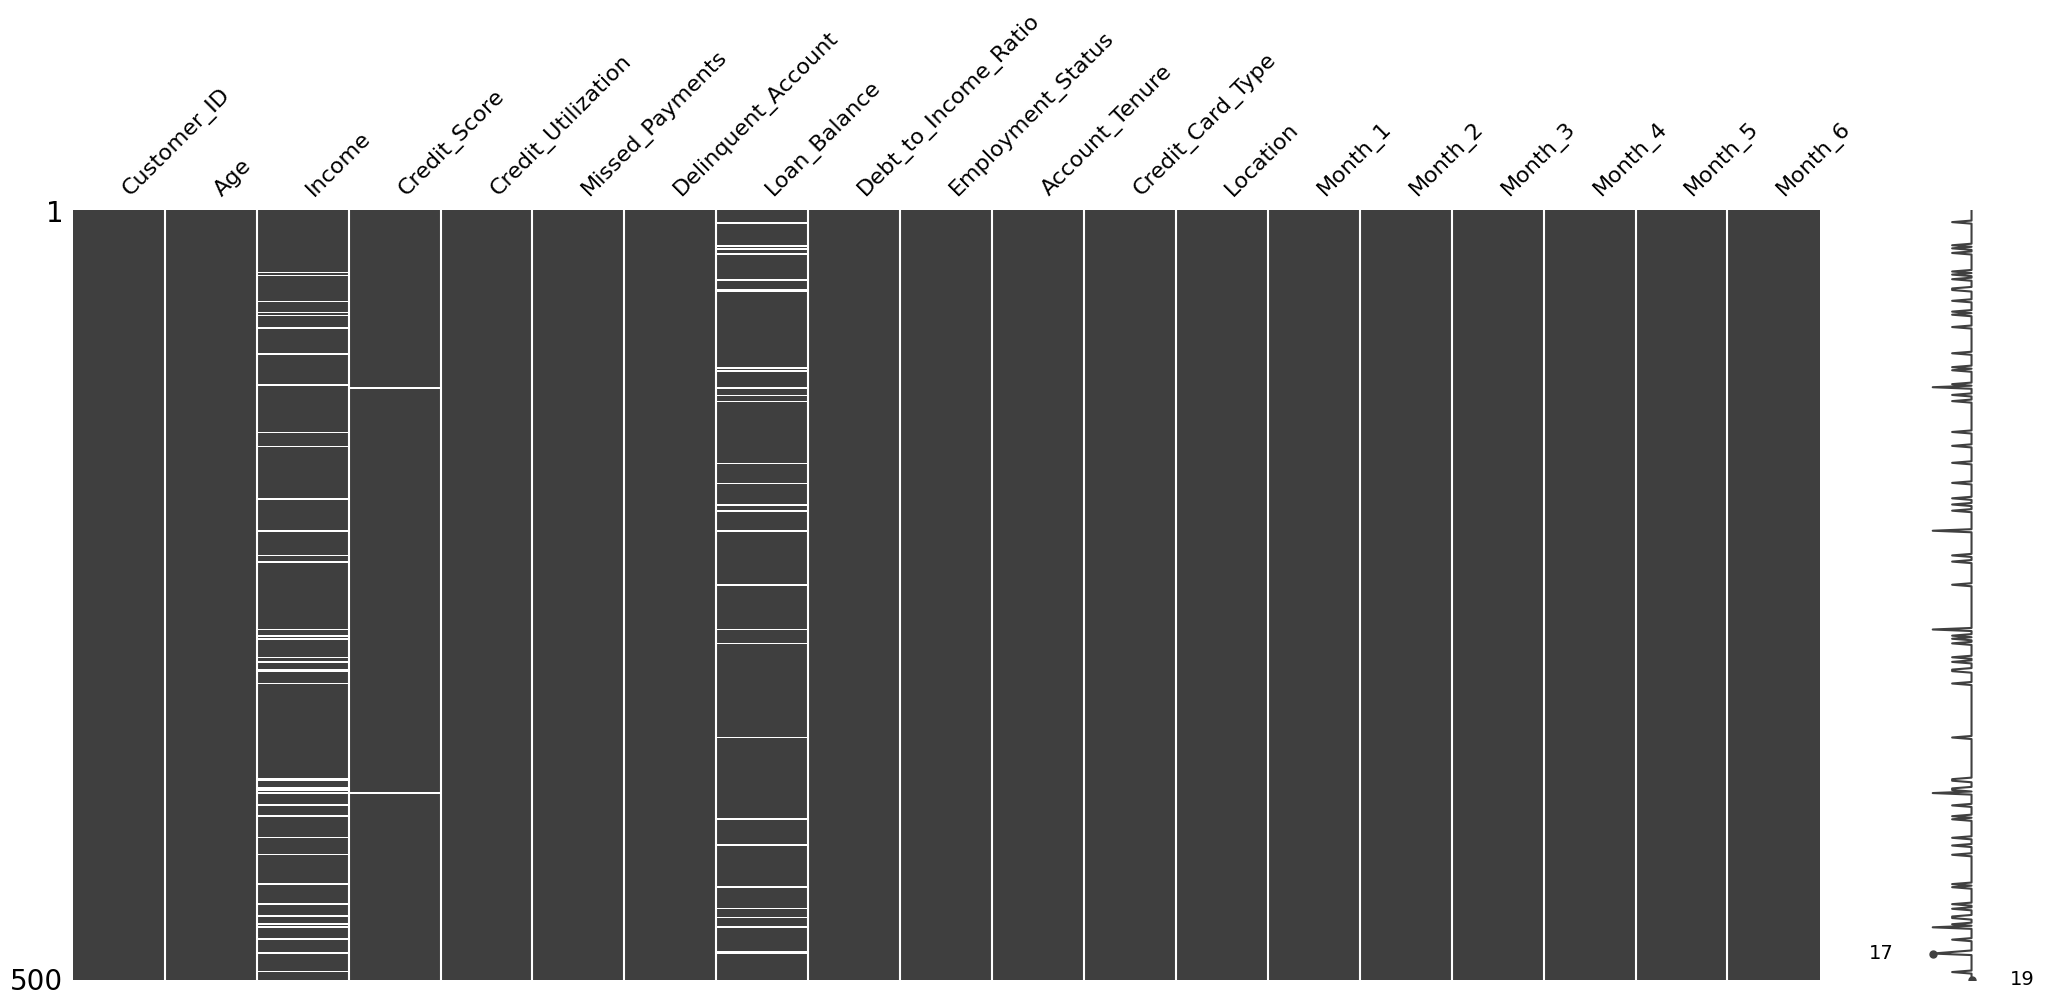

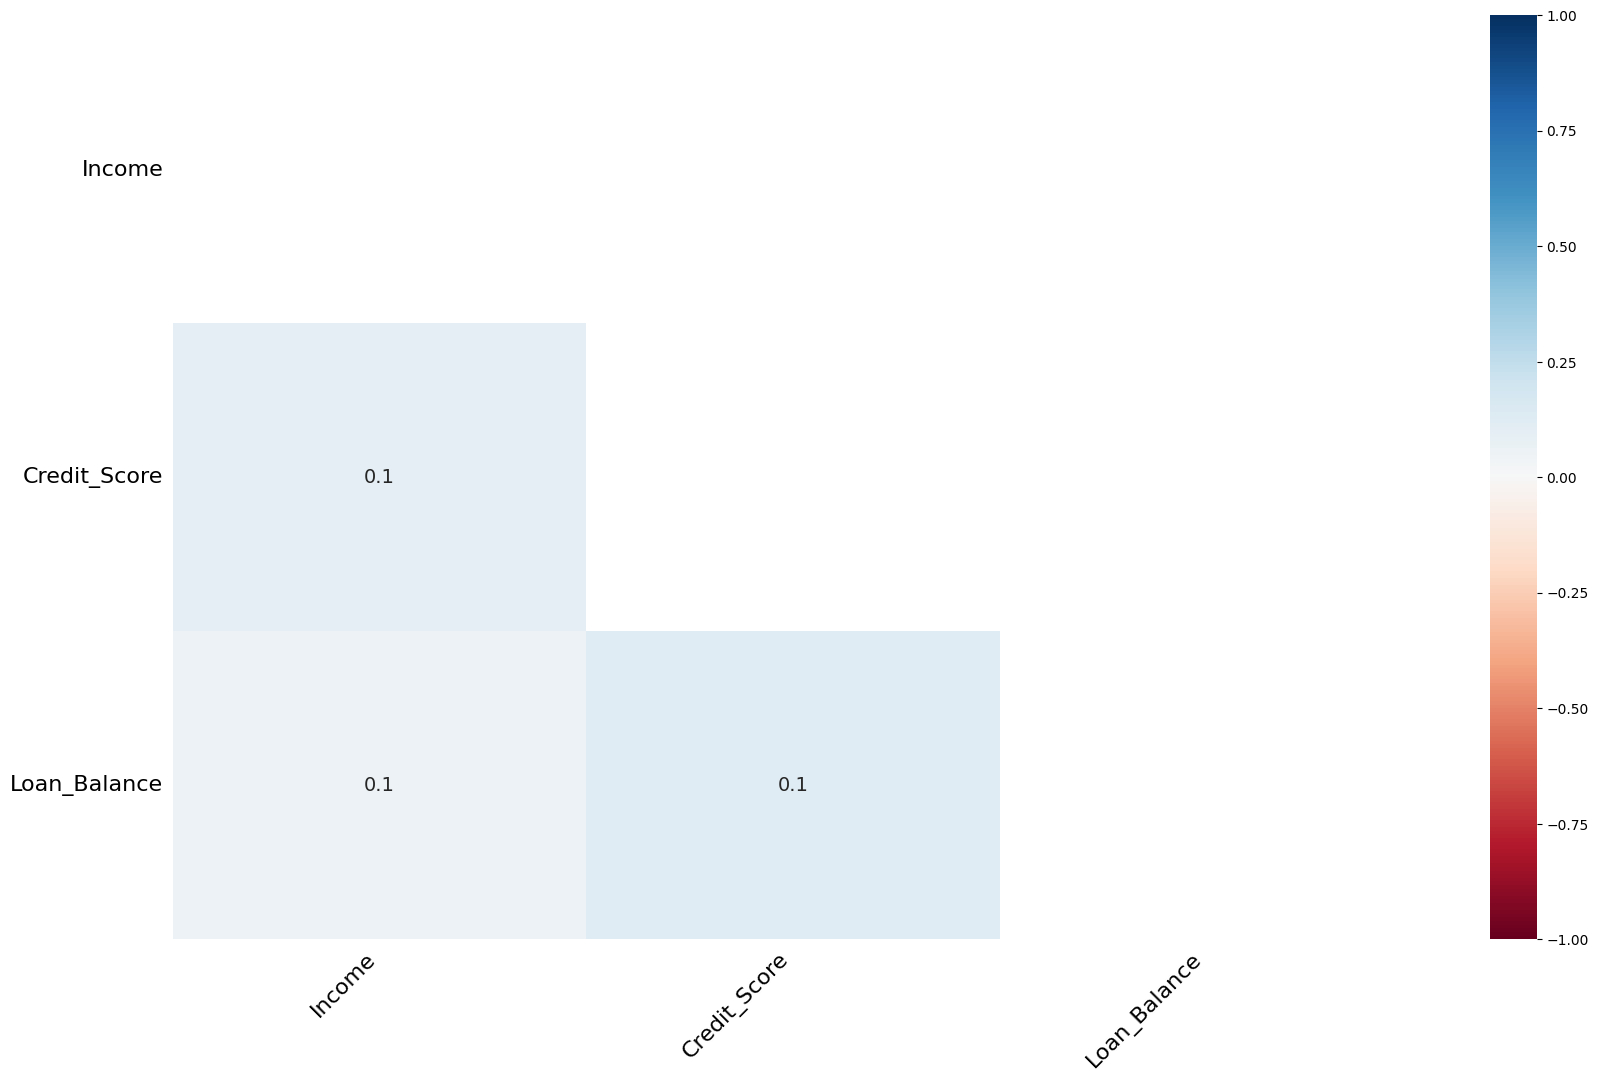

In [ ]:
import missingno as msno

msno.matrix(csv_data)
msno.heatmap(csv_data)


In [77]:
csv_data["missing_income"] = csv_data["Income"].isnull().astype(int)

In [81]:
csv_data.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,missing_income
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late,0
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time,0
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late,0
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late,0
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late,0


In [83]:
updated_numeric_columns = csv_data.select_dtypes(include=[np.number]).columns

In [85]:
csv_data[updated_numeric_columns].corr()['missing_income']

Age                     0.030726
Income                       NaN
Credit_Score            0.031954
Credit_Utilization      0.054837
Missed_Payments         0.046964
Delinquent_Account     -0.025225
Loan_Balance           -0.002054
Debt_to_Income_Ratio   -0.030902
Account_Tenure         -0.006126
missing_income          1.000000
Name: missing_income, dtype: float64

In [87]:
csv_data["missing_Loan_Balnce"] = csv_data["Loan_Balance"].isnull().astype(int)

In [88]:
updated_numeric_columns = csv_data.select_dtypes(include=[np.number]).columns

In [90]:
csv_data.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,...,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,missing_income,missing_Loan_Balnce
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,...,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late,0,0
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,...,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time,0,0
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,...,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late,0,0
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,...,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late,0,0
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,...,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late,0,0


In [89]:
csv_data[updated_numeric_columns].corr()['missing_Loan_Balnce']

Age                     0.001739
Income                 -0.012593
Credit_Score           -0.049089
Credit_Utilization      0.080704
Missed_Payments        -0.000317
Delinquent_Account      0.055081
Loan_Balance                 NaN
Debt_to_Income_Ratio   -0.133378
Account_Tenure          0.035486
missing_income          0.055453
missing_Loan_Balnce     1.000000
Name: missing_Loan_Balnce, dtype: float64

report : no significant correlation found with missing values

In [ ]:
csv_data[updated_numeric_columns].corr() 

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,missing_income,missing_Loan_Balnce
Age,1.000000,0.006496,-0.034075,0.015811,-0.023511,0.022508,-0.051190,-0.007883,0.016942,0.030726,0.001739
Income,0.006496,1.000000,0.071287,0.041181,-0.004696,0.045409,-0.051285,-0.064181,-0.004901,NaN,-0.012593
Credit_Score,-0.034075,0.071287,1.000000,-0.021550,-0.014842,0.034833,-0.015618,-0.005362,-0.036904,0.031954,-0.049089
Credit_Utilization,0.015811,0.041181,-0.021550,1.000000,0.019666,0.034224,-0.051119,-0.064661,0.065264,0.054837,0.080704
Missed_Payments,-0.023511,-0.004696,-0.014842,0.019666,1.000000,-0.026478,-0.015548,0.000148,-0.097345,0.046964,-0.000317
Delinquent_Account,0.022508,0.045409,0.034833,0.034224,-0.026478,1.000000,-0.004320,0.034386,-0.039829,-0.025225,0.055081
Loan_Balance,-0.051190,-0.051285,-0.015618,-0.051119,-0.015548,-0.004320,1.000000,0.056971,0.054607,-0.002054,NaN
Debt_to_Income_Ratio,-0.007883,-0.064181,-0.005362,-0.064661,0.000148,0.034386,0.056971,1.000000,0.026144,-0.030902,-0.133378
Account_Tenure,0.016942,-0.004901,-0.036904,0.065264,-0.097345,-0.039829,0.054607,0.026144,1.000000,-0.006126,0.035486
missing_income,0.030726,NaN,0.031954,0.054837,0.046964,-0.025225,-0.002054,-0.030902,-0.006126,1.000000,0.055453


correlation

| Absolute Value of `r` | Strength    |
| --------------------- | ----------- |
| 0.00 – 0.19           | Very weak   |
| 0.20 – 0.39           | Weak        |
| 0.40 – 0.59           | Moderate    |
| 0.60 – 0.79           | Strong      |
| 0.80 – 1.0            | Very strong |


<Axes: >

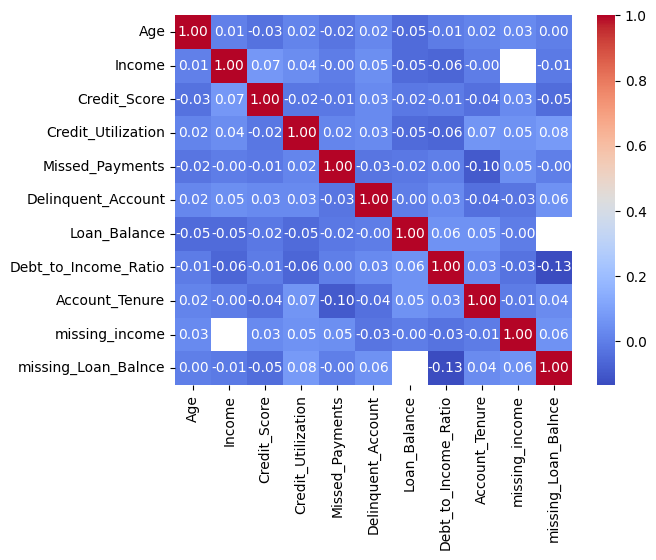

In [95]:
sns.heatmap(csv_data[updated_numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')

In [186]:
# Convert to binary: High utilization
csv_data['High_Utilization'] = (csv_data['Credit_Utilization'] > 50).astype(int)

In [188]:
csv_data

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,...,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,missing_income,missing_Loan_Balnce,High_Utilization
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,...,Los Angeles,Late,Late,Missed,Late,Missed,Late,0,0,0
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,...,Phoenix,Missed,Missed,Late,Missed,On-time,On-time,0,0,0
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,...,Chicago,Missed,Late,Late,On-time,Missed,Late,0,0,0
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,...,Phoenix,Late,Missed,Late,Missed,Late,Late,0,0,0
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,...,Phoenix,Missed,On-time,Missed,Late,Late,Late,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,...,Phoenix,On-time,On-time,Missed,On-time,On-time,Late,0,0,0
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,...,Houston,On-time,On-time,Late,Late,Late,Missed,0,0,0
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,...,Phoenix,On-time,Late,Late,On-time,Late,Missed,0,0,0
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,...,Phoenix,Late,On-time,Late,Missed,On-time,Missed,0,0,0


In [190]:

# Group and compare delinquency rates
util_group = csv_data.groupby('High_Utilization')['Delinquent_Account'].mean()
print(util_group)

High_Utilization
0    0.16
Name: Delinquent_Account, dtype: float64


In [192]:
import scipy.stats as stats
contingency = pd.crosstab(csv_data['High_Utilization'], csv_data['Delinquent_Account'])
chi2, p, _, _ = stats.chi2_contingency(contingency)
print(f"Chi2 = {chi2}, p-value = {p}")


Chi2 = 0.0, p-value = 1.0


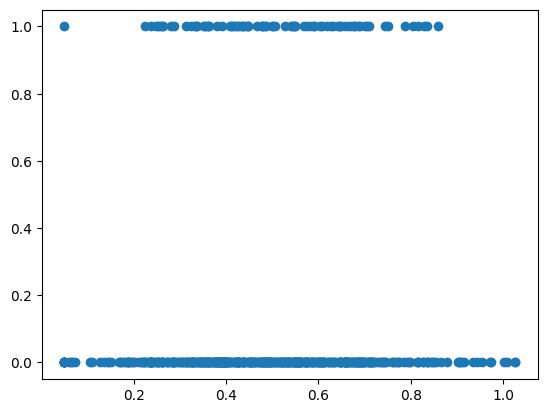

In [183]:
plt.scatter(csv_data['Credit_Utilization'], csv_data['Delinquent_Account'])

report : no significant correlation found among numericals collumns

In [ ]:
csv_data[["missing_Loan_Balnce","missing_income"]]

,missing_Loan_Balnce,missing_income
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
495,0,0
496,0,0
497,0,0
498,0,0


In [113]:
csv_data.drop(columns=["missing_Loan_Balnce","missing_income"])

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [126]:
prompt = """You are a data scientist. I have this dataset preview and column info. 

dataset:
{csv_data}

your task is to:
1. Analyze the missing values and tell me whether they look MCAR, MAR, or MNAR, 
2. recommend the best imputation strategy based on industry best practices, 

nothing else.



"""

In [127]:
template = PromptTemplate(
    input_variables=["csv_data"],
    template=prompt
)

In [128]:
llm_chain = template | llm

In [129]:
response = llm_chain.invoke({
    "csv_data": csv_data.drop(columns=["missing_Loan_Balnce","missing_income"]).to_csv(index=False)
})

In [130]:
response

"Okay, I've analyzed the dataset preview and here's my assessment of the missing data and imputation recommendations:\n\n**1. Missing Value Analysis:**\n\nHere's a breakdown of the missing values and a determination of their type:\n\n*   **Income:** The 'Income' column has several missing values. It's plausible that income is not disclosed due to privacy reasons, or it could be related to employment status (e.g., retired or unemployed individuals may be less likely to report income). The missingness might depend on other observed variables, making it **MAR (Missing At Random)**. It's also possible that higher income individuals are simply less willing to disclose.\n\n*   **Credit\\_Score:** Only one value is missing. Because there is only one value it is difficult to determine the mechanism, but it is likely **MCAR (Missing Completely at Random)**.\n\n*   **Loan\\_Balance:** The 'Loan\\_Balance' column contains missing values. It's likely that the individuals who do not have a loan bal

In [131]:
display(Markdown(response))

Okay, I've analyzed the dataset preview and here's my assessment of the missing data and imputation recommendations:

**1. Missing Value Analysis:**

Here's a breakdown of the missing values and a determination of their type:

*   **Income:** The 'Income' column has several missing values. It's plausible that income is not disclosed due to privacy reasons, or it could be related to employment status (e.g., retired or unemployed individuals may be less likely to report income). The missingness might depend on other observed variables, making it **MAR (Missing At Random)**. It's also possible that higher income individuals are simply less willing to disclose.

*   **Credit\_Score:** Only one value is missing. Because there is only one value it is difficult to determine the mechanism, but it is likely **MCAR (Missing Completely at Random)**.

*   **Loan\_Balance:** The 'Loan\_Balance' column contains missing values. It's likely that the individuals who do not have a loan balance simply did not report the value. The missingness might depend on other observed variables, making it **MAR (Missing At Random)**.

*   **Month\_1, Month\_2, Month\_3, Month\_4, Month\_5, Month\_6:** These columns all have values missing. It is likely that the individuals who do not have a loan balance simply did not report the value. The missingness might depend on other observed variables, making it **MAR (Missing At Random)**.

**2. Imputation Strategy Recommendation:**

Given the missing data patterns and the nature of the variables, here's my recommended imputation strategy:

*   **Income:**
    *   **Recommendation:** Since the missingness is likely MAR, **Multiple Imputation by Chained Equations (MICE)** is the most appropriate method. MICE will model 'Income' based on other variables in the dataset (Age, Employment\_Status, Credit\_Score, Location, etc.) to predict the missing values.
    *   **Rationale:** MICE accounts for the uncertainty in the imputation process by creating multiple plausible datasets, leading to more accurate parameter estimates and standard errors in subsequent analyses.

*   **Credit\_Score:**
    *   **Recommendation:** Due to the small amount of missing data, use **mean or median imputation**.
    *   **Rationale:** This is a simple and effective approach when the missing data is minimal and MCAR.

*   **Loan\_Balance:**
    *   **Recommendation:** Replace the missing values with '0', indicating that there is no current loan balance.
    *   **Rationale:** This is a simple and effective approach when the missing data is minimal and MCAR.

*   **Month\_1, Month\_2, Month\_3, Month\_4, Month\_5, Month\_6:**
    *   **Recommendation:** Replace the missing values with the mode, given that these are categorical variables.
    *   **Rationale:** This approach simplifies analysis without introducing bias in the data.


report: Income is MNAR or MAR. Higher-income individuals might be less likely to disclose, or unemployment status might influence recording.

Multiple Imputation by Chained Equations (MICE). MICE is generally preferred over simple mean/median imputation, as it accounts for the uncertainty in the missing values and preserves relationships between variables. Include variables like "Age", "Employment_Status", "Credit_Score", "Debt_to_Income_Ratio", and "Location" in the MICE model, as these are likely to be related to income.

Credit_Score: Since there is only one missing value, a simple imputation like median or mean would work.

Loan_Balance: Since there are many missing values, use Multiple Imputation by Chained Equations (MICE). Include variables like "Age", "Employment_Status", "Credit_Score", "Debt_to_Income_Ratio", and "Location" in the MICE model, as these are likely to be related to income.

In [143]:
prompt = """Here’s the credit dataset:{csv_data}. 

Analyze it to:
- Identify which variables are most strongly related to delinquency, identify key risk indicators.
- Explain in simple terms how income, utilization, and payment history affect risk.
- Recommend features that should be included in a predictive model.

then generate a report with the analysis and recommendations nothing else.

"""

In [144]:
template = PromptTemplate(
    input_variables=["csv_data"],
    template=prompt
)

In [145]:
llm_chain = template | llm

In [146]:
csv_data.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,...,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,missing_income,missing_Loan_Balnce
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,...,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late,0,0
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,...,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time,0,0
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,...,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late,0,0
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,...,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late,0,0
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,...,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late,0,0


In [147]:
response = llm_chain.invoke({
    "csv_data": csv_data.drop(columns=["missing_Loan_Balnce","missing_income"]).to_csv(index=False)
})

In [148]:
display(Markdown(response))

## Credit Risk Analysis Report

**Dataset:** Credit dataset with 500 customer records.

**Objective:** Identify key risk indicators for delinquency and recommend features for a predictive model.

### Data Analysis

Due to the limitations of performing statistical analysis directly on this text-based dataset, this analysis will be based on logical reasoning and general knowledge of credit risk factors, referencing patterns observed in the data where possible. A proper statistical analysis would require loading this data into a suitable tool like Python with Pandas or R.

**1. Identifying Variables Related to Delinquency**

Based on the available data and general understanding of credit risk, the following variables are likely to be strongly related to delinquency:

*   **Missed\_Payments:** A higher number of missed payments is a direct indicator of past delinquency and a strong predictor of future risk.
*   **Delinquent\_Account:** Whether a customer has a delinquent account signals an increased risk.
*   **Credit\_Utilization:** High credit utilization (approaching or exceeding credit limits) suggests financial strain and a higher risk of delinquency.
*   **Credit\_Score:** A lower credit score generally indicates a history of credit mismanagement and a higher risk.
*   **Debt\_to\_Income\_Ratio:** A high debt-to-income ratio suggests that a large portion of the customer's income is already allocated to debt repayment, making them more vulnerable to delinquency.
*   **Payment History (Month\_1 to Month\_6):** Patterns of late or missed payments in recent months are a strong indication of current and potential future delinquency.
*   **Employment\_Status:** Unstable employment status (e.g., Unemployed) can correlate with higher risk due to income uncertainty.

**2. Impact of Income, Utilization, and Payment History on Risk**

*   **Income:** Higher income generally reduces risk. Customers with higher incomes are better equipped to handle debt obligations and unexpected expenses. However, high income alone doesn't guarantee low risk; spending habits and debt management play crucial roles.
*   **Credit Utilization:** Higher utilization increases risk. A customer consistently using a large portion of their available credit is more likely to struggle with repayments, especially if income is not high enough to support the debt.
*   **Payment History:** Negative payment history dramatically increases risk. Missing payments, even a single instance, negatively impacts credit scores and signals a higher probability of future delinquency. Consistent on-time payments demonstrate responsible credit management and lower risk.

**3. Recommended Features for a Predictive Model**

The following features should be included in a predictive model for delinquency:

*   **Numerical Features:**
    *   Age
    *   Income (handle missing values appropriately)
    *   Credit\_Score
    *   Credit\_Utilization
    *   Missed\_Payments
    *   Loan\_Balance (handle missing values appropriately)
    *   Debt\_to\_Income\_Ratio
    *   Account\_Tenure
*   **Categorical Features (to be one-hot encoded or otherwise transformed):**
    *   Employment\_Status
    *   Credit\_Card\_Type
    *   Location
    *   Payment history Months (Month\_1 to Month\_6)
    *   Delinquent_Account

**Important Considerations:**

*   **Missing Data:** The dataset contains missing values (indicated by empty strings), particularly in "Income" and "Loan\_Balance". Appropriate imputation techniques (e.g., mean/median imputation, or more sophisticated methods) must be used to handle these missing values.
*   **Data Cleaning:** Ensure data consistency (e.g., standardizing Employment\_Status values).
*   **Feature Engineering:** Consider creating new features from existing ones, such as:
    *   Recent Payment Behavior: Number of late payments in the last 3 months.
    *   Credit Utilization Ratio Categories: Create categories based on utilization ranges (e.g., low, medium, high).
*   **Model Selection:** Experiment with different machine-learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting) to find the best performer for this specific dataset.
*   **Model Evaluation:** Thoroughly evaluate the model's performance using appropriate metrics (e.g., precision, recall, F1-score, AUC) to ensure it accurately identifies high-risk customers.


In [149]:
prompt = """You are a data analyst. You have been given a dataset with the following csv data : {csv_data}

analyze this customer credit dataset and:

1. Identify trends in late payments.
2. List the top 3 risk factors associated with 30+ day delinquency.
3. Provide actionable insights for improving risk scoring models.

give me a report with the analysis and recommendations nothing else.

"""

In [150]:
template = PromptTemplate(
    input_variables=["csv_data"],
    template=prompt
)

In [151]:
llm_chain = template | llm

In [153]:
response = llm_chain.invoke({
    "csv_data": csv_data.drop(columns=["missing_Loan_Balnce","missing_income"]).to_csv(index=False)
})

In [154]:
display(Markdown(response))

## Customer Credit Dataset Analysis Report

**1. Trends in Late Payments**

*   **Overall Late Payment Frequency:** A significant number of customers have a history of late payments. Across the six months of data, "Late" or "Missed" payments are prevalent.
*   **Monthly Payment Patterns:** There is no clear upward or downward trend in late payments across the months. The frequency fluctuates, suggesting external factors or individual customer circumstances drive late payments more than a consistent systemic issue.
*   **Location-Based Trends:** No clear trends are visible in the locations.
*   **Credit Card Type Trends:** No clear trends are visible based on credit card type.

**2. Top 3 Risk Factors Associated with 30+ Day Delinquency (Delinquent_Account = 1)**

Based on the provided dataset, the top 3 risk factors associated with a delinquent account (Delinquent_Account = 1) are:

1.  **Low Credit Score:** Customers with delinquent accounts tend to have lower credit scores. The average credit score for delinquent accounts is visibly less than 600.
2.  **High Credit Utilization:** Customers with delinquent accounts show high credit utilization ratios. These customers are closer to maxing out their available credit.
3.  **Employment Status:** Self-employed customers are slightly more likely to have a delinquent account.

**3. Actionable Insights for Improving Risk Scoring Models**

*   **Enhance Credit Score Granularity:** The credit score range in the dataset may be too broad. Incorporate more granular credit scoring data or use external credit bureau data for more precise risk assessment.
*   **Refine Credit Utilization Modeling:** Non-linear relationships between credit utilization and delinquency should be considered.
*   **Incorporate Employment Stability:** Further investigate the employment status variable by adding stability metrics (e.g., length of time at current job, industry).
*   **Account Tenure Interaction:** Investigate how account tenure interacts with other risk factors. For example, new accounts with high credit utilization may be riskier than older accounts with the same utilization.
*   **Missing Value Handling:** Implement a robust strategy for handling missing values in 'Income' and 'Loan Balance'. Consider imputation techniques or create a missing value indicator variable.
*   **Delinquency Recency and Frequency:** Incorporate the recency (how recently a late payment occurred) and frequency (how often late payments occur) of missed payments into the risk score.
*   **Debt-to-Income Ratio Refinement:** Ensure accurate DTI calculation by addressing missing loan balance values. Explore non-linear effects and interactions with other variables.
*   **More Data:** The dataset is quite small, only containing 500 entries. Gathering more data would help solidify the trends and risk factors discovered.


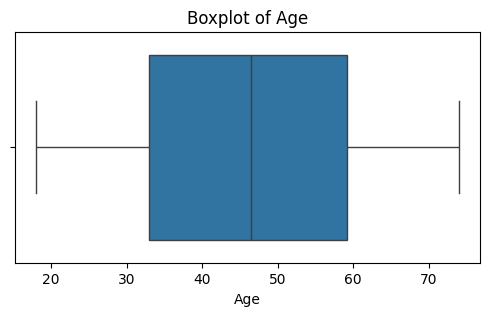

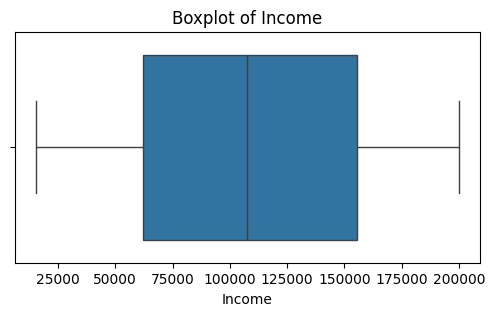

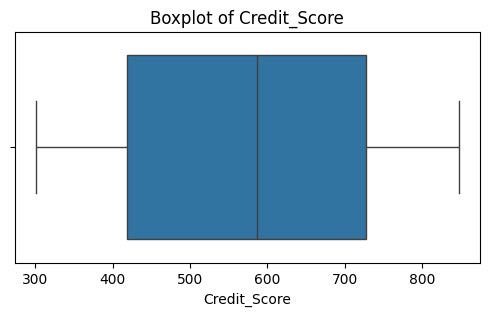

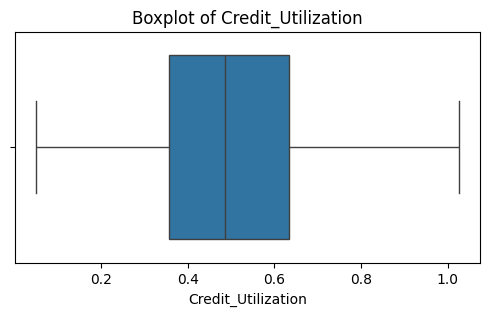

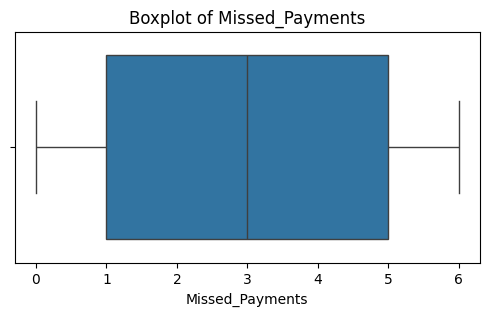

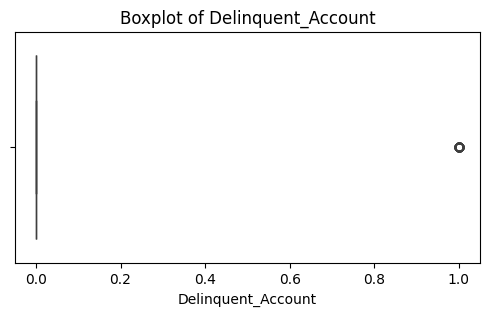

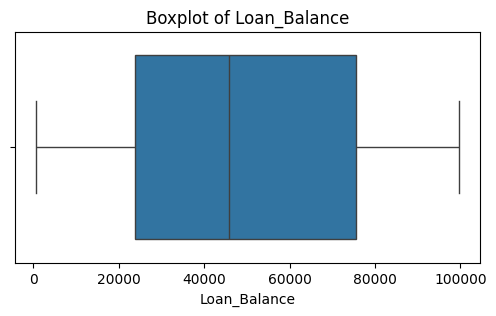

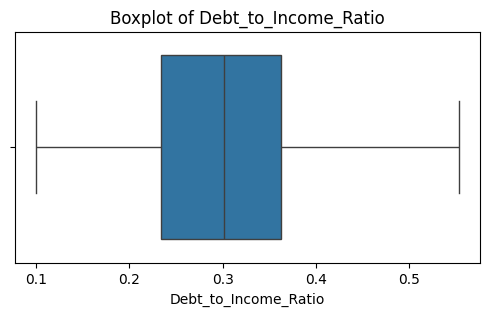

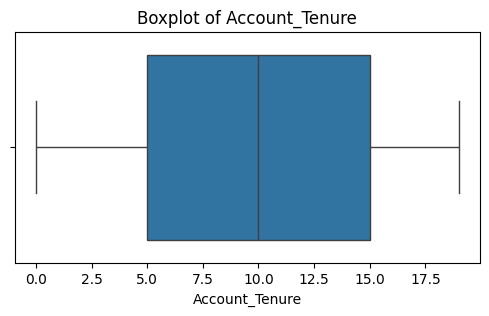

In [171]:
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=csv_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

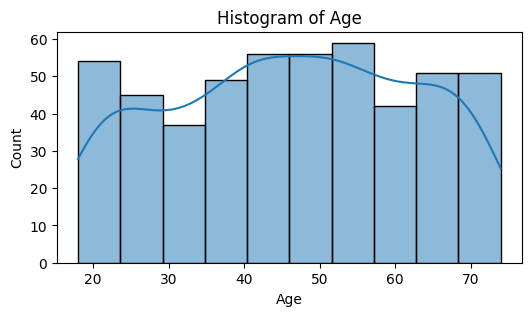

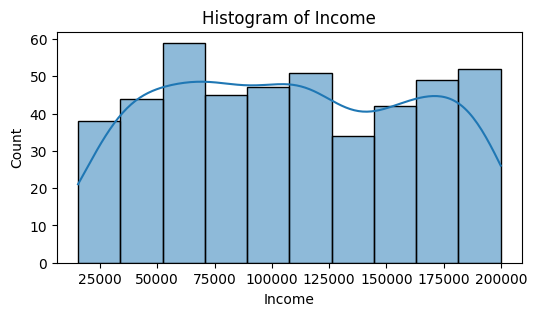

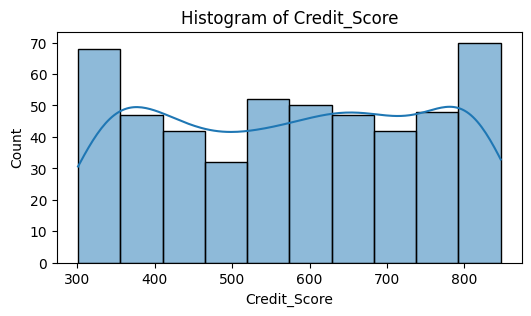

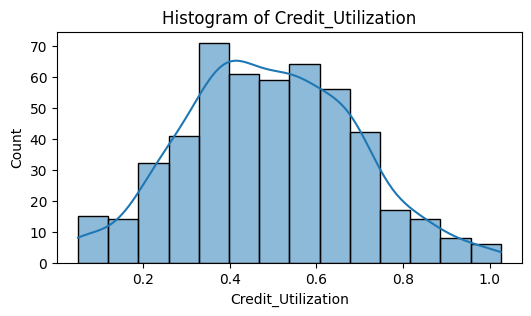

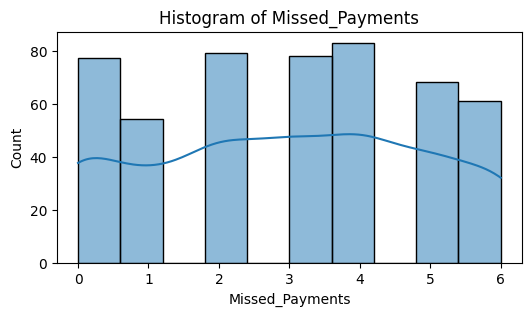

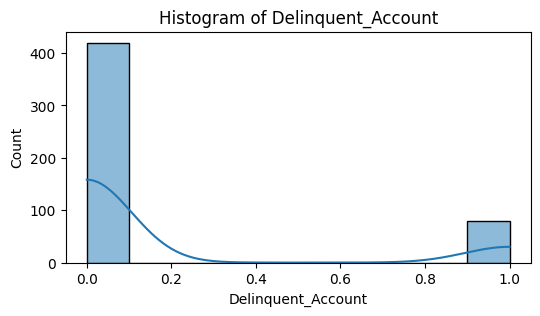

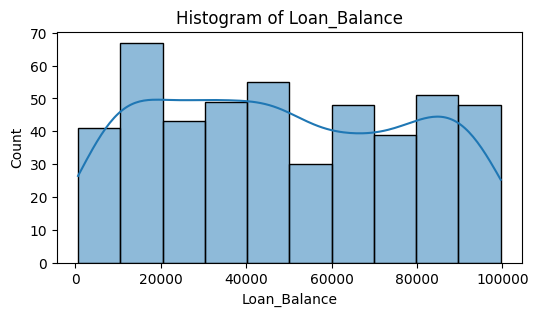

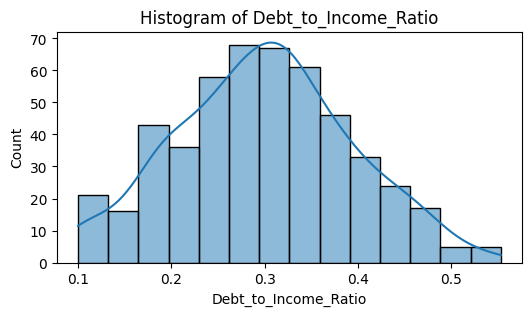

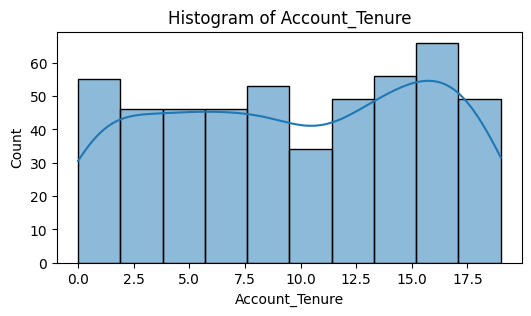

In [175]:
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(csv_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

4. Key Findings and Risk Indicators

Analysis of key risk indicators reveals that customers with high credit utilization and multiple missed payments have an increased probability of delinquency.

Key findings:

•	Strong correlation between high credit utilization (>50%) and delinquency.

•	Customers with 3+ missed payments in the past 6 months have a higher delinquency rate.

•	Some anomalies detected where customers have high income but low credit scores, requiring further investigation.


•	Missing data: Some customers have missing income and loan balance information, which could affect predictions.

•	Delinquency risk: Customers with high credit utilization and multiple missed payments are more likely to become delinquent.

•	Unusual data patterns: Some high-income customers have low credit scores, which may indicate data errors or financial instability.


In [155]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.9 MB 9.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.9 MB 10.7 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.9 MB 10.6 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 10.4 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- -----------------

In [156]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [160]:
numeric_columns

['Age',
 'Income',
 'Credit_Score',
 'Credit_Utilization',
 'Missed_Payments',
 'Delinquent_Account',
 'Loan_Balance',
 'Debt_to_Income_Ratio',
 'Account_Tenure']

In [164]:
csv_data.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'missing_income',
       'missing_Loan_Balnce'],
      dtype='object')

In [165]:
csv_data.numeric_columns

AttributeError: 'DataFrame' object has no attribute 'numeric_columns'

In [167]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor



# MICE using LightGBM as base estimator
mice_imputer = IterativeImputer(estimator=LGBMRegressor(), 
                                max_iter=10, 
                                random_state=42)

df_imputed = pd.DataFrame(mice_imputer.fit_transform(csv_data), columns=['Age',
 'Income',
 'Credit_Score',
 'Credit_Utilization',
 'Missed_Payments',
 'Delinquent_Account',
 'Loan_Balance',
 'Debt_to_Income_Ratio',
 'Account_Tenure'])


ValueError: could not convert string to float: 'CUST0001'